#Urban Air Pollution Machine Learning

Air pollution is one of the most challenging experiences urban dwellers have to face everyday. Apart from it being a nuisance to breath dirty air, it leads to alot of respiratory diseases.

In this project, my aim is to create a model that predicts PM 2.5 particulate matter concentration in the air every day for each city.

PM 2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers(mm) and is one of the most harmful air pollutants.

**Import Necessary Libraries**

In [75]:
pip install dash

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Train Dataset**

In [78]:
Urban_Pollution = pd.read_csv('/content/drive/MyDrive/Train.csv')

**Exploratory Data Analysis**

This analysis helps understand the data and derive insights from it that are essential to build an effective model.

In [79]:
Urban_Pollution.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,02/01/2020,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,03/01/2020,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226563,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-11,11/01/2020,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,010Q650 X 2020-01-12,12/01/2020,010Q650,31.0,22.0,38.0,153.08,72,12.200000,28.000000,...,21.439475,-62.253749,24.637207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,010Q650 X 2020-01-13,13/01/2020,010Q650,25.0,17.0,41.0,286.02,90,13.600000,29.200001,...,45.461741,-54.350118,21.431726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [80]:
Urban_Pollution.shape

(5792, 82)

In [81]:
Urban_Pollution['target'].describe()

count    5792.000000
mean       72.717196
std        55.083031
min         1.000000
25%        31.000000
50%        58.000000
75%        97.000000
max       815.000000
Name: target, dtype: float64

In [82]:
# Filling all the null values with 0
Urban_Pollution.fillna(value=0, inplace=True)

In [83]:
Urban_Pollution.isnull().sum().sum()

0

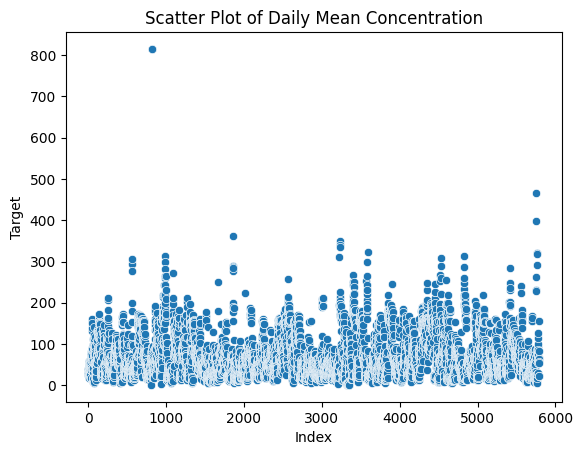

In [84]:
# Creating a scatter plot
sns.scatterplot(x=Urban_Pollution.index, y='target', data=Urban_Pollution)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Scatter Plot of Daily Mean Concentration')

# Display the plot
plt.show()

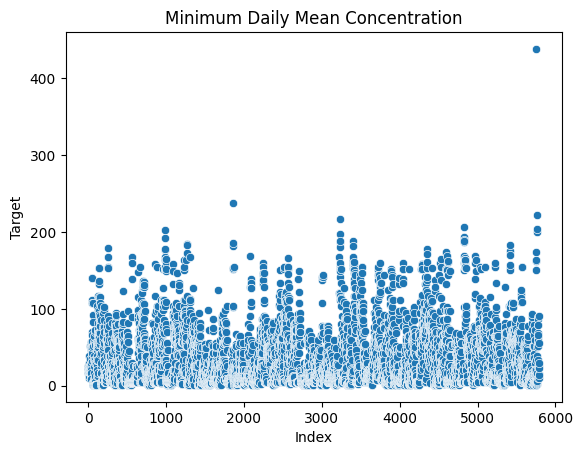

In [85]:
# Creating a scatter plot
sns.scatterplot(x=Urban_Pollution.index, y='target_min', data=Urban_Pollution)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Minimum Daily Mean Concentration')

# Display the plot
plt.show()

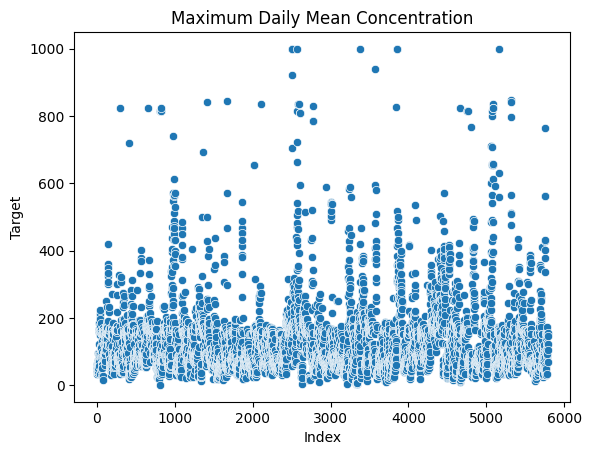

In [86]:
# Creating a scatter plot
sns.scatterplot(x=Urban_Pollution.index, y='target_max', data=Urban_Pollution)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Maximum Daily Mean Concentration')

# Display the plot
plt.show()

The three graphs depict the daily PM2.5 concentration, along with the minimum and maximum target values. In certain instances, outliers were observed, such as a value of 815 in the target column and 438 in the target_min column. Despite their extreme nature, I decided to retain these outliers in the analysis.

In [87]:
Urban_Pollution.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,5792.000000,5792.000000,5792.000000,5.792000e+03,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,...,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,72.717196,36.918767,135.202555,1.039795e+04,119.133633,13.115875,67.445339,0.005471,8.821753,0.265438,...,25.128726,-109.651553,39.299950,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,55.083031,38.625346,113.514597,5.876513e+04,136.746719,9.195230,19.623298,0.003454,9.649181,2.303894,...,20.575253,76.804615,23.333662,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.971144,9.300000,0.000139,-34.647879,-12.058059,...,0.000000,-179.539879,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,31.000000,6.000000,65.000000,1.114060e+03,43.000000,6.697222,53.799999,0.003162,2.693478,-1.030348,...,3.799816,-166.219695,26.044691,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726936,0.000000
50%,58.000000,23.000000,104.000000,2.763020e+03,72.000000,10.467139,70.599998,0.004557,8.021085,0.173170,...,23.799159,-156.369692,46.107038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97.000000,57.000000,165.000000,7.915730e+03,144.000000,16.900000,83.400002,0.006822,16.219453,1.493164,...,43.370590,-0.053385,57.714348,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1517.000000,67.496147,100.000000,0.020665,33.877913,13.298136,...,65.536184,179.518578,79.454761,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [90]:
import dash
from dash import Dash, dcc, html, Input, Output
import numpy as np

app = Dash(__name__)

num_marks = 10  # Number of marks to display on the range slider

app.layout = html.Div([
    html.H4('Distribution of PM 2.5 Concentration by Location'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by PM2.5 Concentration:"),
    dcc.RangeSlider(
        id='range-slider',
        min=Urban_Pollution['target'].min(),
        max=Urban_Pollution['target'].max(),
        step=0.1,
        marks={
            value: str(value)
            for i, value in enumerate(
                np.linspace(Urban_Pollution['target'].min(), Urban_Pollution['target'].max(), num_marks)
            )
        },
        value=[Urban_Pollution['target'].min(), Urban_Pollution['target'].max()]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"),
    Input("range-slider", "value"))
def update_scatter_plot(slider_range):
    low, high = slider_range
    mask = (Urban_Pollution['target'] >= low) & (Urban_Pollution['target'] <= high)
    filtered_df = Urban_Pollution[mask]
    fig = px.scatter(
        filtered_df, x="Place_ID", y="target",
        color="Place_ID", size='target',
        hover_data=['Place_ID'])
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>